# Project: TMDb Movie Data Analysis Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this Project, we shall be analysing a movie data set gotten from The Movie Database. This data set contains about 10,000 movies detailing pertinent information about the movies that would aid our investigation.
The dataset includes information such as the following: 
1. **id:** Unique Identifier for each movie
2. **imdb_id:** Unique Identifier assigned to each movie by imdb
3. **Popularity:** The popularity rating of the movie
4. **Budget:** Budget for the movie
5. **Revenue:** Revenue for the movie
6. **Original Title:** Original Title of the movie
7. **Cast:** The cast of the movie
8. **Homepage:** Homepage link of the movie
9. **Director:** The Director of the movie
10. **Tagline:** The tagline associated with the movie
11. **Keywords:** Keywords associated with the movie
12. **Overview:** A brief description of the movie
13. **Runtime:** The length of the movie including ending credits
14. **Genres:** The category of the movie
15. **Production Companies:** The companies involved in the production of the movie
16. **Release Date:** The official date of release
17. **Vote Count:** Number of votes
18. **Vote average:** Average number of votes
19. **Release year:** The year in which the movie was released
20. **Adjusted Budget:** The budget for the movie in terms of 2010 dollars adjusted for inflation
21. **Adjusted Revenue:**  The revenue of the movie in terms of 2010 dollars adjusted for inflation



### Question(s) for Analysis
> For this analysis, we shall be answering the following questions:

>**Which properties are correlated with revenue?**

>**Does the Director have any impact on the revenue or rating?**

>**What is the relationship between the vote_count, vote_average, and popularity?**

>**Does the Production Company have any impact on the revenue or rating?**

>**Does the cast have any impact on the revenue or rating?**

>**What were the top 10 movies by Revenue?**

>**What are the top 10 genres by revenue?**

>**What kinds of properties are associated with movies that have high revenues?**

In [929]:
# This code cell is used to import all the packages to be used on this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties


In [1027]:
# Load data
df = pd.read_csv('tmdb_movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>The TMDb data has been loaded into a dataframe. The first five rows of data were displayed to get a sense of what the data looks like

In [1028]:
#Insepct Data - Shape
df.shape

(10866, 21)

> The code cell above was used to get the shape of the data. There is a total of 10,866 rows and 21 columns by default in this data set

In [1029]:
#Inspect Data - info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>The code cell above shows the datatype for each column and the count of data in each column. It is evident that there are missing values in some columns. These will be handled appropriately in the upcoming sections.

In [1030]:
#Inspect Data - Describe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>The code cell above provides statistical information about the dataset. This gives an idea of the columns with numeric data types and the statistics of the data in these columns. This would be useful for analysis in upcoming sections.


### Data Cleaning
> **Steps**: Following the information gathered in the cells above. The following cells shall invstigate the dataset further making it useful for analysis
 

In [1031]:
# Checking for duplicates on imdb_id
df['imdb_id'].duplicated().sum()

10

In [1032]:
# Viewing duplicates on imdb-id
df[df['imdb_id'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000e+00,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000e+00,0.0


In [1033]:
# Further investigation on Duplicates using id
df.id.duplicated().sum()

1

In [1034]:
# Viewing duplicates on id
df[df['id'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [1035]:
# Drop duplicates
df.drop_duplicates(inplace=True)
# Confirming drop
df.shape

(10865, 21)

In [1036]:
# Another Confirmation that duplicates were dropped
df.duplicated().sum()

0

In [1037]:
# Investigating missing rows on imdb_id
df[df['imdb_id'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


In [1038]:
# Confriming duplicates in the imdb_id column were dropped
df['imdb_id'].duplicated().sum()

9

In [1039]:
# Drop columns
df_clean = df.drop(['imdb_id','homepage','tagline','keywords','overview'],axis = 1)
df_clean.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


>Duplicates were investigated on both __*id*__ and __*imdb_id*__. 1 duplicate was found across both __*imdb_id*__ and __*id*__, however, 9 duplicates were found on __*imdb_id*__. This was due to NA values

>From our info query, __*imdb_id*__  had 10,856 entries of 10,866, i.e. 10 missing values. Drilling down to those 10 values did not suggest any irrelevance of the entire row to the dataset. This informed the decision to drop the __*imdb_id*__ column and work with only one identifier column, i.e. __*id*__

>A decision was made to drop the columns: **imdb_id**, **homepage**, **tagline**, **keywords**, and **overview** because they do not have any influence on the questions we seek to answer, thereby making the data less bulky and easier to work with

>Saving this adjusted dataset to a new dataframe __*df_clean*__ was intentional. This was to ensure that the original data frame was kept intact and available within this workspace for use if the need arises. __*df_clean*__ will be the data frame upon which all cleaning exercises will take place going forward.

In [1040]:
# Inspect Data - Columns with missing data
df_clean.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [1041]:
# Drop Data - Columns with missing data
df_clean.dropna(axis = 0, inplace=True)

In [1042]:
# Confirming all mising values have been dropped
df_clean.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> It was discovered that columns **"Cast"**, **"Director"**, **"Genres"**, and **"Production companies"** had missing values.

> All missing values were dropped as these columns are going to be utilized in our analysis. 

In [1043]:
# Further investigations for cleaning
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   original_title        9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   director              9772 non-null   object 
 7   runtime               9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   production_companies  9772 non-null   object 
 10  release_date          9772 non-null   object 
 11  vote_count            9772 non-null   int64  
 12  vote_average          9772 non-null   float64
 13  release_year          9772 non-null   int64  
 14  budget_adj            9772 non-null   float64
 15  revenue_adj         

In [1044]:
#Adjusting data type for release date

# Converting datatypes for date columns
df_clean['release_date']  = df_clean['release_date'].astype('datetime64[ns]');

In [1045]:
# Confirming the data type was changed successfully
df_clean['release_date'].dtype

dtype('<M8[ns]')

In [1046]:
# Converting revenue and budget to float

df_clean['revenue']  = df_clean['revenue'].astype('float64');
df_clean["budget"]  = df_clean["budget"].astype("float64");

# Formatting all currency denominated values in currency format with 2 decimal places

df_clean.revenue.round(2);
df_clean.budget.round(2);
df_clean.revenue_adj.round(2);
df_clean.budget_adj.round(2);

    

In [1047]:
# Confirming changes
df_clean.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [1048]:
# Extracting records without revenue data from the dataset
df_cleaned = df_clean.query('revenue != 0')
df_cleaned.head(10)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


In [1049]:
# Checking all records have revenue data
df_cleaned.query('revenue_adj == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


> Investigations were done into the data types. It was discovered that the data type for the __*release_date*__ was not ideal. This was corrected to a **datetime** format

>Furthermore, the data type for **_revenue_** and **_budget_** was not appropriate. Seeing that the columns are used for currency data, the corresponding code cell above was used to change the datatype to a float datatype, rounding up the values to 2 decimal places.

> All rows without revenue data was dropped as this data is essential for our analysis.

>The dataset has been cleaned and is now ready for further analysis. The cleaned data set has been named __*df_cleaned*__. This is the dataset upon which EDA will be performed

<a id='eda'></a>
## Exploratory Data Analysis

### Research Q1: Which properties are correlated with revenue? 

In [1050]:
df_cleaned.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [964]:
# Plotting all numeric variables with the adjusted revenue 
    # to see the properties that are correlated with the adjusted revenue

#Defining a function to plot scatter diagrams with a trend line (line of best fit)
def scatter_trend (dataset,xaxis,yaxis,xlabels,ylabels):
    sns.regplot(x=dataset[xaxis], y=dataset[yaxis]);
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)

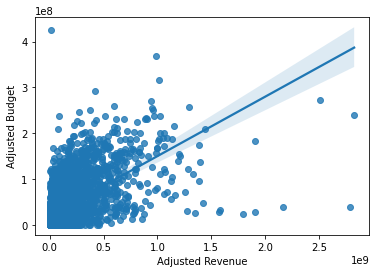

In [965]:
scatter_trend(df_cleaned,'revenue_adj','budget_adj','Adjusted Revenue','Adjusted Budget');

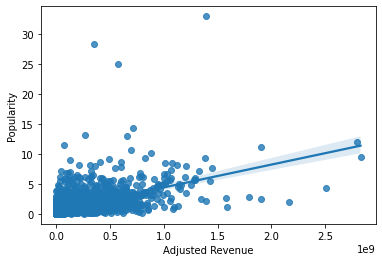

In [966]:
scatter_trend(df_cleaned,'revenue_adj','popularity','Adjusted Revenue','Popularity');

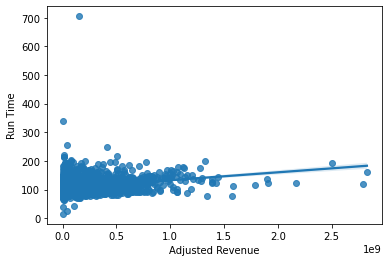

In [967]:
scatter_trend(df_cleaned,'revenue_adj','runtime','Adjusted Revenue','Run Time');

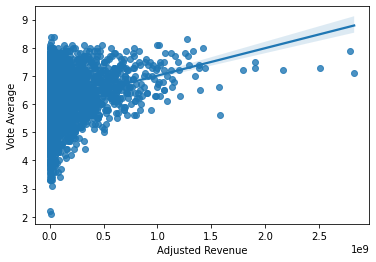

In [968]:
scatter_trend(df_cleaned,'revenue_adj','vote_average','Adjusted Revenue','Vote Average');

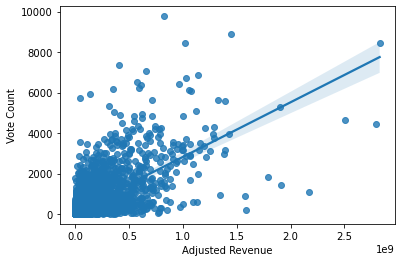

In [969]:
scatter_trend(df_cleaned,'revenue_adj','vote_count','Adjusted Revenue','Vote Count');

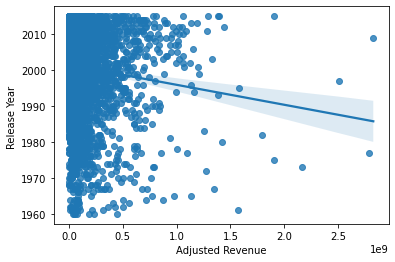

In [970]:
scatter_trend(df_cleaned,'revenue_adj','release_year','Adjusted Revenue','Release Year ');

> Investigating __*revenue_adj*__ as the dependent variable. The following were plotted as indpendent variables against __*revenue_adj*__ to investigate the correlation.
>   1. budget_adj
>   2. popularity
>   3. runtime
>   4. vote_average
>   5. vote_count
>   6. release_year

>A line of best fit was plotted through each chart. It was observed that all the variables have a correlation with the adjusted revenue except for __*release_year*__. These correlations however vary in strength and would require further investigations to draw meaningful conclusions.

### Research Q2: Does the director have any impact on the revenue or rating?

In [971]:
# Defining a function to plot graphs
def my_barplot (dataset,x,y,col,xlabels,ylabels,titles):
    width = 0.35
    plt.barh(dataset[x],dataset[y],width,color = str(col))
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.title(titles)

In [972]:
# Preserving cleaned dataset by setting a new variable
df_direct = df_cleaned
df_cleaned.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [973]:
# Splitting the director column for explosion
df_direct['director'] = df_direct['director'].str.split('|')

C:\Users\21340\AppData\Local\Temp\ipykernel_5080\1979319470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direct['director'] = df_direct['director'].str.split('|')


In [974]:
# Exploding the director column
df_dir = df_direct.explode('director').reset_index()
df_dir.head(2)

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [1064]:
# Total number of directors
df_dir.groupby('director')['original_title'].count().shape

(2231,)

In [975]:
# getting n for top 200 movies
new_dir = df_dir.nlargest(n=233, columns = ['revenue_adj'])
new_dir.groupby('original_title').revenue.sum().reset_index()

,original_title,revenue
0,2012,7.696536e+08
1,A Star Is Born,1.610000e+08
2,Airport,1.004892e+08
3,Aladdin,1.008100e+09
4,Alice in Wonderland,1.025467e+09
...,...,...
195,Up,1.462685e+09
196,War of the Worlds,5.917394e+08
197,Who Framed Roger Rabbit,3.298040e+08
198,X-Men: Days of Future Past,7.460000e+08


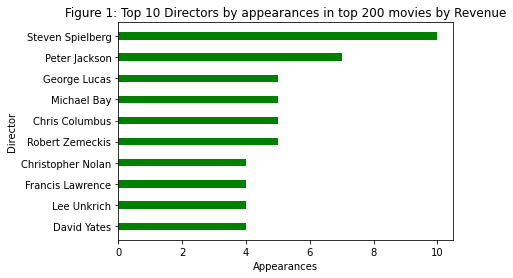

In [976]:
# In a sample size of 200, sort revenue in descending order. Find the frequency of director by movie for each director and plot the top 10.
# Using total revenue, i.e. revenue_adj 
new_dir = df_dir.nlargest(n=233, columns = ['revenue_adj'])
director = new_dir.groupby('director')['revenue_adj'].count().reset_index()
plotdir = director.sort_values('revenue_adj',ascending = True)
my_barplot(plotdir.tail(10),'director','revenue_adj','green','Appearances','Director', 'Figure 1: Top 10 Directors by appearances in top 200 movies by Revenue')

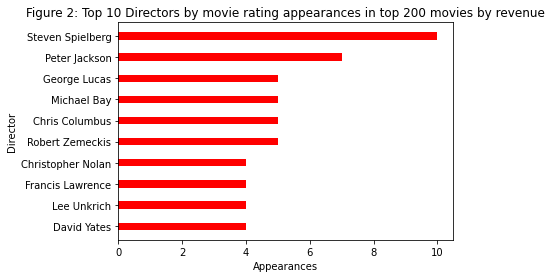

In [977]:
# In a sample size of 200, sort revenue in descending order. Find the frequency of each director and plot the top 10.
# Using Vote average
new_dirvote = df_dir.nlargest(n=233, columns = ['revenue_adj'])
director2 = new_dirvote.groupby('director')['vote_average'].count().reset_index()
plotdir2 = director2.sort_values('vote_average',ascending = True)
my_barplot(plotdir2.tail(10),'director','vote_average','red', 'Appearances','Director', 'Figure 2: Top 10 Directors by movie rating appearances in top 200 movies by revenue')

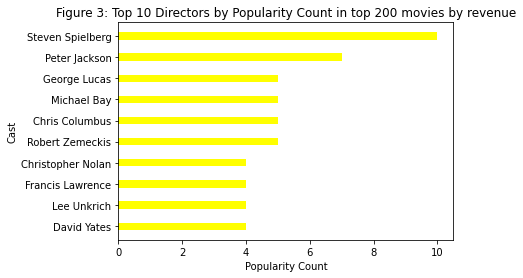

In [978]:
# In a sample size of 200, sort revenue in descending order. Find the frequency of each director and plot the top 10.
# Using popularity count
new_dirvote = df_dir.nlargest(n=233, columns = ['revenue_adj'])
director3 = new_dirvote.groupby('director')['popularity'].count().reset_index()
plotdir3 = director3.sort_values('popularity',ascending = True)
my_barplot(plotdir3.tail(10),'director','popularity','yellow', 'Popularity Count','Cast', 'Figure 3: Top 10 Directors by Popularity Count in top 200 movies by revenue')

In [979]:
# Case study: Viewing the 10 movies by Steven Speilberg in the top 200 movies by revenue
new_dirvote.query('director == "Steven Spielberg"')

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4729,9806,578,2.563191,7000000.0,470654000.0,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09
4237,8889,601,2.900556,10500000.0,792910554.0,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,1982-04-03,1830,7.2,1982,2.372625e+07,1.791694e+09
4895,10223,329,2.204926,63000000.0,920100000.0,Jurassic Park,Sam Neill|Laura Dern|Jeff Goldblum|Richard Att...,Steven Spielberg,127,Adventure|Science Fiction,Universal Pictures|Amblin Entertainment,1993-06-11,3169,7.4,1993,9.509661e+07,1.388863e+09
510,1334,840,1.104816,20000000.0,303788635.0,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135,Science Fiction|Drama,Columbia Pictures Corporation|EMI Films|Julia ...,1977-11-16,600,7.0,1977,7.195562e+07,1.092965e+09
3974,8375,85,4.578300,18000000.0,389925971.0,Raiders of the Lost Ark,Harrison Ford|Karen Allen|Paul Freeman|Ronald ...,Steven Spielberg,115,Adventure|Action,Lucasfilm|Paramount Pictures,1981-06-12,2506,7.5,1981,4.316743e+07,9.351169e+08
4393,9180,89,3.536655,48000000.0,474171806.0,Indiana Jones and the Last Crusade,Harrison Ford|Sean Connery|Denholm Elliott|Ali...,Steven Spielberg,127,Adventure|Action,Lucasfilm|Paramount Pictures,1989-05-24,2031,7.4,1989,8.443128e+07,8.340611e+08
1266,2879,217,3.161670,185000000.0,786636033.0,Indiana Jones and the Kingdom of the Crystal S...,Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray ...,Steven Spielberg,122,Adventure|Action,Lucasfilm|Paramount Pictures,2008-05-21,1537,5.6,2008,1.873655e+08,7.966945e+08
3677,7883,87,2.556799,28000000.0,333000000.0,Indiana Jones and the Temple of Doom,Harrison Ford|Kate Capshaw|Jonathan Ke Quan|Am...,Steven Spielberg,118,Adventure|Action,Lucasfilm|Paramount Pictures,1984-05-23,1735,6.9,1984,5.877318e+07,6.989810e+08
2839,6205,74,1.844731,132000000.0,591739379.0,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,Steven Spielberg,116,Adventure|Thriller|Science Fiction,Paramount Pictures|DreamWorks SKG|Cruise/Wagne...,2005-06-28,1238,5.9,2005,1.473864e+08,6.607145e+08
4284,8974,857,2.170136,70000000.0,481840909.0,Saving Private Ryan,Tom Hanks|Tom Sizemore|Dennis Farina|Max Marti...,Steven Spielberg,169,Drama|History|War,Paramount Pictures|DreamWorks SKG|Amblin Enter...,1998-07-24,3396,7.7,1998,9.363868e+07,6.445564e+08


>The aim of the analysis above was to investigate if the choice of director has any impact on the revenue generated or the ratings of the movie.

> Some movies had multiple directors. There were a total of 2,231 directors in this data set. This analysis only focused on individual directors and not pairings. The director column was split and then exploded. This was to isolate each director for all the movies they were inovloved in.

> A sample size of 200 movies with the highest adjusted revenue was selected. The data was grouped by the directors to investigate the number of times the director's work featured in the top 200. Furthermore, the grouping was summed by revenue in order to see the contrast with the count. This did not yield any substantial difference

> Due to the positive correlation between the __*vote_average*__, **Popularity**, and __*revenue_adj*__ as illustrated in Question 1 above, Figures 1 to 3 are very similar.

>**CONCLUSION:** The domination of particular directors of 2,231 in the top 200 movies of the analysis above suggests that the choice of Director has an impact on the revnue, average vote and popularity of the movie. This also suggests that there is a positive correlation between the average vote and the popularity of a movie

### Research Q3: What is the relationship between the vote_count, vote_average, and popularity?

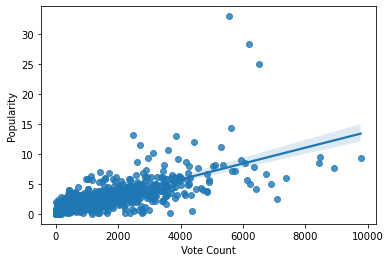

In [793]:
# Plotting a scatter chart of vote_count vs popularity
scatter_trend(df_cleaned,'vote_count','popularity','Vote Count','Popularity');

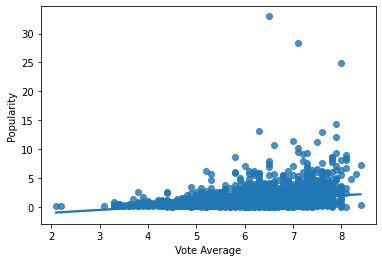

In [794]:
# Plotting a scatter chart of vote_average vs popularity
scatter_trend(df_cleaned,'vote_average','popularity','Vote Average','Popularity');

> As suspected during the analysis of **Research Q2**, there is a positive correlation between the votes and the popularity of a movie.

### Research Q4: Does the Production company have any impact on the revenue or rating?

In [1069]:
# Preserving original data set by setting new variable
df_pro = df_cleaned

In [981]:
# Splitting the Production_companies column for explosion
df_pro['production_companies'] = df_pro['production_companies'].str.split('|')

C:\Users\21340\AppData\Local\Temp\ipykernel_5080\474016856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro['production_companies'] = df_pro['production_companies'].str.split('|')


In [982]:
# Exploding the Production_companies column
df_produ = df_pro.explode('production_companies').reset_index()
df_produ.head(2)

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,[Colin Trevorrow],124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,[Colin Trevorrow],124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [1070]:
# Total number of production companies
df_produ.groupby('production_companies')['original_title'].count().shape

(3926,)

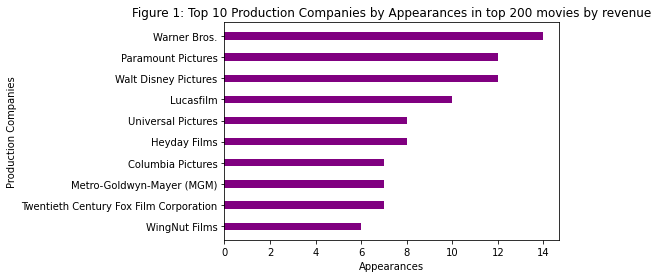

In [983]:
# In a sample size of 200, sort revenue in descending order. Find the frequency of each production company and plot the top 10.
# Using frequency of appearance, i.e. revenue_adj count
new_prod = df_produ.nlargest(n=233, columns = ['revenue_adj'])
production = new_prod.groupby('production_companies')['revenue_adj'].count().reset_index()
plot_prod = production.sort_values('revenue_adj',ascending = True)
my_barplot(plot_prod.tail(10),'production_companies','revenue_adj','purple','Appearances', 'Production Companies', 'Figure 1: Top 10 Production Companies by Appearances in top 200 movies by revenue')

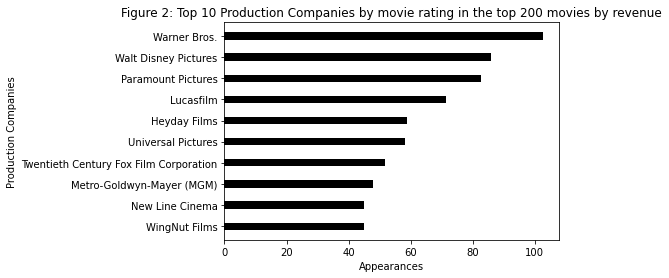

In [984]:
# In a sample size of 200, sort revenue in descending order. Find the frequency of each production company and plot the top 10.
# Using vote_average
new_prod = df_produ.nlargest(n=233, columns = ['revenue_adj'])
production = new_prod.groupby('production_companies')['vote_average'].sum().reset_index()
plot_prod = production.sort_values('vote_average',ascending = True)
my_barplot(plot_prod.tail(10),'production_companies','vote_average','black','Appearances', 'Production Companies', 'Figure 2: Top 10 Production Companies by movie rating in the top 200 movies by revenue')

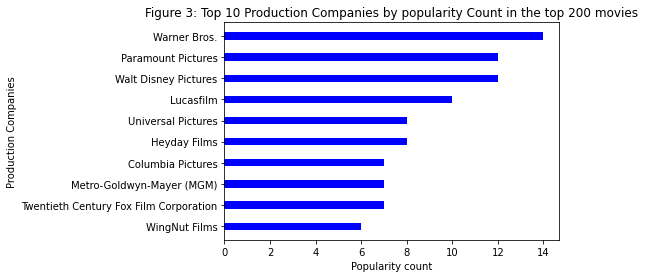

In [914]:
# In a sample size of 200, sort revenue in descending order. Find the frequency of each production company and plot the top 10.
# Using popularity
new_prod = df_produ.nlargest(n=233, columns = ['revenue_adj'])
production = new_prod.groupby('production_companies')['popularity'].count().reset_index()
plot_prod = production.sort_values('popularity',ascending = True)
my_barplot(plot_prod.tail(10),'production_companies','popularity','blue','Popularity count', 'Production Companies', 'Figure 3: Top 10 Production Companies by popularity Count in the top 200 movies')

>The aim of the analysis above was to investigate if the choice of production company has any impact on the revenue generated or the ratings of the movie.

> Some movies had multiple production companies.There were a total of 3,926 production companies in the exploded dataset. This analysis only focused on individual companies and not pairings. The production_company column was split and then exploded. This was to isolate each company for all the movies they were inovloved in.

> A sample size of 200 movies with the highest adjusted revenue was selected. The data was grouped by the production company to investigate the number of times the companies' work featured in the top 200. 

> Due to the positive correlation between the __*vote_average*__, **Popularity**, and __*revenue_adj*__ as illustrated in Question 1 above, Figures 1 to 3 are very similar.

>**CONCLUSION:** The domination of particular production companies of a total of 3,926 in the top 200 movies in the analysis above suggests that the choice of production company has an impact on the revnue, average vote and popularity of the movie.

### Research Q5: Does the cast have any impact on the revenue or rating?

In [985]:
# Preserving original data set by setting new variable
df_cast = df_cleaned
df_cast.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,[Colin Trevorrow],124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,[George Miller],120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [986]:
# Splitting the cast column for explosion
df_cast['cast'] = df_cast['cast'].str.split('|')

C:\Users\21340\AppData\Local\Temp\ipykernel_5080\1044733945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast['cast'] = df_cast['cast'].str.split('|')


In [987]:
# Exploding the cast column
df_cast2 = df_cast.explode('cast').reset_index()
df_cast2

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,[Colin Trevorrow],124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Bryce Dallas Howard,[Colin Trevorrow],124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Irrfan Khan,[Colin Trevorrow],124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Vincent D'Onofrio,[Colin Trevorrow],124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Nick Robinson,[Colin Trevorrow],124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,10848,2161,0.207257,5115000.0,1.200000e+07,Fantastic Voyage,Stephen Boyd,[Richard Fleischer],100,Adventure|Science Fiction,[Twentieth Century Fox Film Corporation],2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
23643,10848,2161,0.207257,5115000.0,1.200000e+07,Fantastic Voyage,Raquel Welch,[Richard Fleischer],100,Adventure|Science Fiction,[Twentieth Century Fox Film Corporation],2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
23644,10848,2161,0.207257,5115000.0,1.200000e+07,Fantastic Voyage,Edmond O'Brien,[Richard Fleischer],100,Adventure|Science Fiction,[Twentieth Century Fox Film Corporation],2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
23645,10848,2161,0.207257,5115000.0,1.200000e+07,Fantastic Voyage,Donald Pleasence,[Richard Fleischer],100,Adventure|Science Fiction,[Twentieth Century Fox Film Corporation],2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07


In [1072]:
# Total number of cast
df_cast2.groupby('cast')['original_title'].count().shape

(8263,)

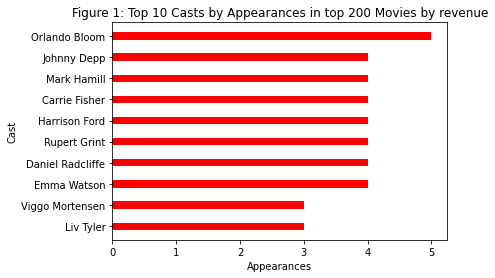

In [988]:
# In a sample size of 200, sort revenue in descending order. Find the frequency of each cast and plot the top 10.
# Using revenue
new_cast = df_cast2.nlargest(n=233, columns = ['revenue_adj'])
cast_grp = new_cast.groupby('cast')['revenue_adj'].count().reset_index()
casted = cast_grp.sort_values('revenue_adj',ascending = True)
my_barplot(casted.tail(10),'cast','revenue_adj','red','Appearances', 'Cast', 'Figure 1: Top 10 Casts by Appearances in top 200 Movies by revenue')

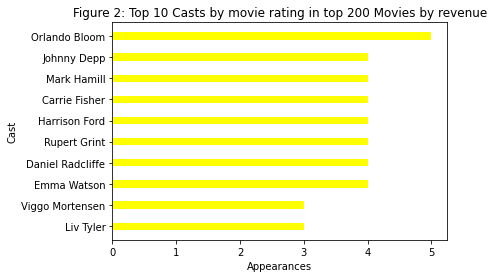

In [989]:
# In a sample size of 200, sort revenue in descending order. Find the frequency of each cast and plot the top 10.
# Using vote_average
new_cast = df_cast2.nlargest(n=233, columns = ['revenue_adj'])
cast_grp = new_cast.groupby('cast')['vote_average'].count().reset_index()
casted = cast_grp.sort_values('vote_average',ascending = True)
my_barplot(casted.tail(10),'cast','vote_average','yellow','Appearances', 'Cast', 'Figure 2: Top 10 Casts by movie rating in top 200 Movies by revenue')


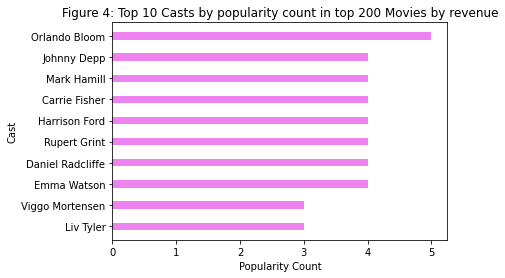

In [1073]:
# In a sample size of 200, sort revenue in descending order. Find the frequency of each cast and plot the top 10.
# Using popularity
new_cast = df_cast2.nlargest(n=233, columns = ['revenue_adj'])
cast_grp = new_cast.groupby('cast')['popularity'].count().reset_index()
casted = cast_grp.sort_values('popularity',ascending = True)
my_barplot(casted.tail(10),'cast','popularity','violet','Popularity Count', 'Cast', 'Figure 4: Top 10 Casts by popularity count in top 200 Movies by revenue')


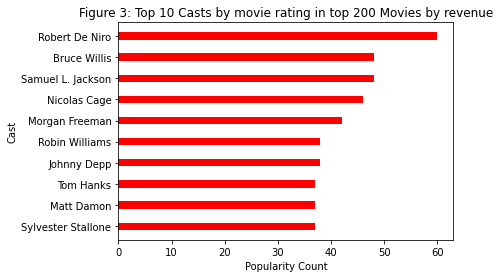

In [992]:
# Investigating the relationship between the cast and popularity
new_cast = df_cast2.nlargest(n=233, columns = ['revenue_adj'])
cast_grp = df_cast2.groupby('cast')['popularity'].count().reset_index()
casted = cast_grp.sort_values('popularity',ascending = True)
my_barplot(casted.tail(10),'cast','popularity','red','Popularity Count', 'Cast', 'Figure 3: Top 10 Casts by movie rating in top 200 Movies by revenue')


>The aim of the analysis above was to investigate if individual cast has any impact on the revenue generated or the ratings of the movie.

> This analysis only focused on individual casts and not casts in groups. There were a total of 8,326 cast in the exploded data set. 
The cast column was split and then exploded. This was to isolate each cast for all the movies they were inovloved in.

> A sample size of 200 movies with the highest adjusted revenue was selected. The data was grouped by the cast to investigate the number of times the cast featured in movies that were in the top 200. 

> Due to the positive correlation between the __*vote_average*__, **Popularity**, and __*revenue_adj*__ as illustrated in Question 1 above, Figures 1 to 3 are very similar.

>**CONCLUSION:** The charts above does not show any significant differences due to cast. Further analysis would need to be carried out and perhaps grouping as well to draw more insight.Therefore, from the analyis above, we can not conclude that the cast has any impact on the revenue and rating. Further investigations are required.

### Research Q6: What are the top 10 genres by revenue?

In [1051]:
# Preserving original data set by setting new variable
df_topgen = df_cleaned

In [1052]:
# Splitting the genres column for explosion
df_topgen['genres'] = df_topgen['genres'].str.split('|')

C:\Users\21340\AppData\Local\Temp\ipykernel_5080\4130992013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topgen['genres'] = df_topgen['genres'].str.split('|')


In [1053]:
# Exploding the genres column
df_topgen10 = df_topgen.explode('genres').reset_index()
df_topgen10.head(3)

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


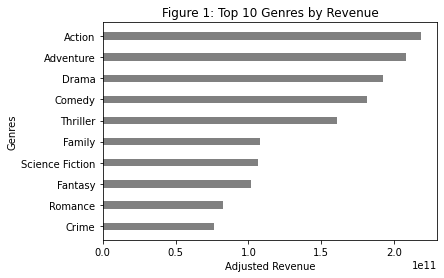

In [1054]:
# Finding the top 10 Genres by revenue
genre_grp = df_topgen10.groupby('genres')['revenue_adj'].sum().reset_index()
top_10 = genre_grp.nlargest(n = 10, columns = ['revenue_adj'])
top_10_sort = top_10.sort_values(['revenue_adj'], ascending = True)
my_barplot(top_10_sort,'genres','revenue_adj','grey','Adjusted Revenue', 'Genres', 'Figure 1: Top 10 Genres by Revenue')

>The bar chart above shows the top 10 Genres by adjusted revenue. Adjusted revenue was used because the values have been adjusted for inflation thereby giving a true represnetation of the revenue for each movie irrespective of the release year.

>From the chart above, based off the information available, it is evident that the top genre between 1960 and 2015 is **Action**.

### Research Q7: Top 10 Movies by Revenue?

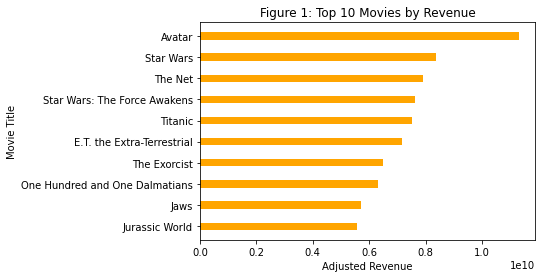

In [1055]:
# Finding the top 10 movies by revenue
genre_grp = df_topgen10.groupby('original_title')['revenue_adj'].sum().reset_index()
top_10 = genre_grp.nlargest(n = 10, columns = ['revenue_adj'])
top_10_sort = top_10.sort_values(['revenue_adj'], ascending = True)
my_barplot(top_10_sort,'original_title','revenue_adj','orange','Adjusted Revenue', 'Movie Title', 'Figure 1: Top 10 Movies by Revenue')

>The bar chart above shows the top 10 movies by adjusted revenue. Adjusted revenue was used because the values have been adjusted for inflation thereby giving a true represnetation of the revenue for each movie irrespective of the release year.

>From the chart above, based off the information available, it is evident that the top grossing movie between 1960 and 2015 is **Avatar**.

### Research Q8:  What is the Total Revenue Generated across each Decade?

In [1056]:
df_totrev = df_cleaned

C:\Users\21340\AppData\Local\Temp\ipykernel_5080\1023016862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totrev['Decade_grouping'] = pd.cut(df_totrev['release_year'], bins, include_lowest = True, right = True)


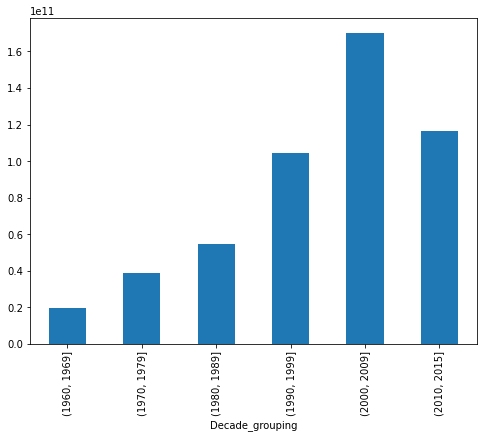

In [1057]:
bins = pd.IntervalIndex.from_tuples([(1960, 1969), (1970, 1979), (1980, 1989), (1990, 1999), (2000,2009),(2010, 2015)])
df_totrev['Decade_grouping'] = pd.cut(df_totrev['release_year'], bins, include_lowest = True, right = True)
fig, axes = plt.subplots(1,1, figsize = (8,6))
df_totrev.groupby('Decade_grouping')['revenue_adj'].sum().plot(kind = 'bar');

> A general overview of the movie industry shows the performance of the movie indsutry between 1960 and 2015. The data was further cleaned specifically for this analysis. The first code cell was used to confirm that the rows without **_revenue_** data were identical with the rows without **_adjusted revenue_** data.

>The years were grouped into decades and the adjusted revenue was plotted against each year. The adjusted revenue was used because the values have been adjusted for inflation thereby giving a true represnetation of the values per decade.


<a id='conclusions'></a>
## Conclusions

> **What kinds of properties are associated with movies that have high revenues?**: This question sums up all the analysis that has been done so far. The analysis above suggests that the **choice of director**, **choice of production company**, **movie rating (vote_average)**, and **popularity** have an impact on the revenue generated by the movie.

### Limitations

> The limitations encountered in the analysis above are highlighted below:
>  1. Missing values were encountered in the data which had to be dropped. This inadvertently limited the totality of the analysis with respect to the entire dataset.
>  2. The data by itself without missing values would be sufficient to draw meaningful conclusions, however, further statistacal investigations would be required to draw deeper conclusions.
>  3. More information could have been provided in the data such as production duration, costs, etc for deeper insights to be drawn.

### Notes
>It is important to note that this analysis was done with the following assumptions/constraints:
>  1. Sample size of top 200 movies by revenue
>  2. Casts, Directors, and Production Companies were analysed individually with respect to the data and did not take into consideration the effect of groups on the whole data set
>  3. Adjusted revenue was used for the analysis as opposed to the actual revenue as the adjusted revenue took into consideration the time value of money and the effect of inflation/deflation.
